# import python libs

In [39]:
import pandas
import configparser
import psycopg2

# connect to db

In [40]:
config = configparser.ConfigParser()
config.read('config.ini')

host=config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd = config['myaws']['pwd']

conn = psycopg2.connect(  host=host,
                       user=user,
                       password = pwd,
                       dbname=db)

In [41]:
cur=conn.cursor()

# Q1

In [7]:
sql_stat = """
        select * from gp7.student

"""

In [8]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,s_email,s_name,s_major
0,monterreyche@jmu.edu,Monterrey Cheese,Anthropology
1,billykbob@jmu.edu,Billy Bob,Biology
2,nickybswann@jmu.edu,Nick Swann,Math
3,chasewpoodle@jmu.edu,Chase Poodle,Political Science
4,johnsmith086@jmu.edu,John Smith\n,SMAD
5,andreburns50@jmu.edu,Andrea Burns\n,Sociology
6,johnsoneric1@jmu.edu,Eric Johnson,Kinesiology
7,grantcarter9@jmu.edu,Grant Carter,CIS
8,piersonpert@jmu.edu,Pierson Pert,Business
9,loucthompson@jmu.edu,Lou Thompson,Finance


# Q2

In [8]:
sql_stat = """
        select gp7.professor.p_name,
                gp7.course.c_name
        from gp7.professor
        inner join gp7.course
        on gp7.professor.p_email = gp7.course.p_email
        
"""

In [9]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,p_name,c_name
0,Orlandrew Danzell,Introduction to National Security Intelligence
1,Noel Hendrickson,Counterfactual Reasoning
2,Stephen Marrin,Seminar on Issues in Intelligence Analysis
3,Jim Akron,Intelligence Analysis
4,Jim Akron,Data Mining-2


# Q3

In [10]:
sql_stat = """
        select count (course_num) as enrolled,
        course_num
        from gp7.enroll_list
        group by course_num
"""

In [11]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,enrolled,course_num
0,2,IA 340
1,4,IA 313
2,2,IA 200
3,2,IA 300


<AxesSubplot:xlabel='course_num'>

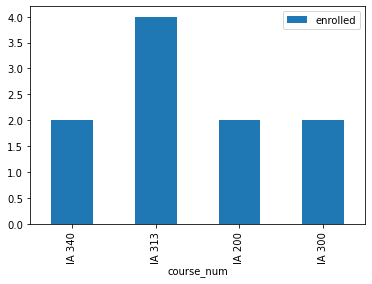

In [13]:
df = pandas.read_sql_query(sql_stat,conn)

df.plot.bar(x='course_num',y='enrolled')

# Q4

In [20]:
sql_stat = """
        select gp7.professor.p_name,
            count(gp7.course.c_name) as teaching_number
        from gp7.professor
        inner join gp7.course
        on gp7.professor.p_email = gp7.course.p_email
        group by professor.p_name
        order by teaching_number desc
"""

In [21]:
df = pandas.read_sql_query(sql_stat,conn)
df[:]

,p_name,teaching_number
0,Jim Akron,2
1,Noel Hendrickson,1
2,Stephen Marrin,1
3,Orlandrew Danzell,1


<AxesSubplot:xlabel='p_name'>

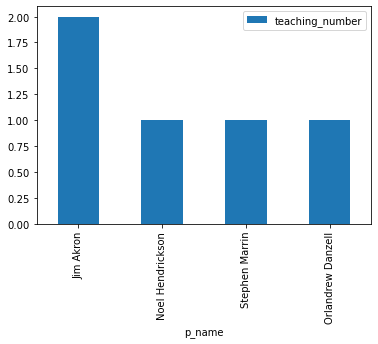

In [22]:
df = pandas.read_sql_query(sql_stat,conn)

df.plot.bar(x='p_name',y='teaching_number')

# Q5

In [37]:
q5_insert_professor_sql = """
            insert into gp7.professor(p_email,p_name,p_office)
            values('{}','{}','{}')
            """.format('new_lab4_email','new_p_lab4_name','new_lab4_o')
print(q5_insert_professor_sql)


            insert into gp7.professor(p_email,p_name,p_office)
            values('new_lab4_email','new_p_lab4_name','new_lab4_o')
            


In [38]:
cur.execute(q5_insert_professor_sql)

IntegrityError: duplicate key value violates unique constraint "professor_pkey"
DETAIL:  Key (p_email)=(new_lab4_email) already exists.


In [14]:
conn.commit()

In [28]:
df=pandas.read_sql_query('select * from gp7.professor',conn)
df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,ISAT 107
1,marrinsp@jmu.edu,Stephen Marrin,EnGeo 2104
2,hendrinx@jmu.edu,Noel Hendrickson,ISAT 317
3,jim08@jmu.edu,Jim Akron,ISAT 140
4,new_lab4_email,new_p_lab4_name,new_lab4_o


In [54]:
q5_insert_course_sql = """
            insert into gp7.course(course_num,c_name,c_room_num,p_email)
            values('{}','{}','{}','{}')
            """.format('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
print(q5_insert_course_sql)


            insert into gp7.course(course_num,c_name,c_room_num,p_email)
            values('new_lab4_c','new_lab4_n','new_lab4_r','new_lab4_email')
            


In [55]:
cur.execute(q5_insert_course_sql)

In [56]:
df=pandas.read_sql_query('select * from gp7.course',conn)
df[:]

,course_num,c_name,c_room_num,p_email
0,IA 200,Introduction to National Security Intelligence,Festival Conf 7,danzelox@jmu.edu
1,IA 313,Counterfactual Reasoning,EnGeo 1204,hendrinx@jmu.edu
2,IA 300,Seminar on Issues in Intelligence Analysis,ISAT 150,marrinsp@jmu.edu
3,IA 450,Intelligence Analysis,ISAT 200,jim08@jmu.edu
4,IA 340,Data Mining-2,ISAT 336,jim08@jmu.edu
5,new_lab4_c,new_lab4_n,new_lab4_r,new_lab4_email


# Q6

In [63]:
q6_update_course_sql ="""
                    update gp7.course
                    set p_email = '{}'
                    where p_email ='{}'
                    """.format('new_lab4_email','danzelox@jmu.edu')

In [64]:
cur.execute(q6_update_course_sql)

In [65]:
conn.commit()

In [66]:
df=pandas.read_sql_query('select * from gp7.course',conn)
df[:]

,course_num,c_name,c_room_num,p_email
0,IA 313,Counterfactual Reasoning,EnGeo 1204,hendrinx@jmu.edu
1,IA 300,Seminar on Issues in Intelligence Analysis,ISAT 150,marrinsp@jmu.edu
2,IA 450,Intelligence Analysis,ISAT 200,jim08@jmu.edu
3,IA 340,Data Mining-2,ISAT 336,jim08@jmu.edu
4,IA 200,Introduction to National Security Intelligence,Festival Conf 7,new_lab4_email


In [67]:
q6_delete_professor_sql = """
                            delete from gp7.professor
                            where p_email='{}'
                            """.format('hendrinx@jmu.edu')

In [68]:
cur.execute(q6_delete_professor_sql)

In [69]:
conn.commit()

In [70]:
df=pandas.read_sql_query('select * from gp7.professor',conn)
df[:]

,p_email,p_name,p_office
0,danzelox@jmu.edu,Orlandrew Danzell,ISAT 107
1,marrinsp@jmu.edu,Stephen Marrin,EnGeo 2104
2,jim08@jmu.edu,Jim Akron,ISAT 140
3,new_lab4_email,new_p_lab4_name,new_lab4_o


# close the cursor and connection

In [71]:
cur.close()

In [72]:
conn.close()